In [1]:
import pandas as pd

In [2]:

train_df = pd.read_csv('../files/input/train_data.csv.zip',index_col=False,compression='zip')
test_df = pd.read_csv('../files/input/test_data.csv.zip',index_col=False,compression='zip')
# print(train_df.head())
# print(train_df.shape)
# print(train_df.columns)

In [3]:
train_df.rename(columns={"default payment next month": "default"}, inplace=True)
test_df.rename(columns={"default payment next month": "default"}, inplace=True)
#print(train_df.columns)
train_df.drop(columns=["ID"], inplace=True)
test_df.drop(columns=["ID"], inplace=True)
suma_nulos_train = train_df.isna().sum()
suma_nulos_test = test_df.isna().sum()
#print(suma_nulos_train)
#print(suma_nulos_test)

# train_df.dropna(inplace=True)
# print(train_df.value_counts("EDUCATION"))
train_df["EDUCATION"] = train_df["EDUCATION"].apply(lambda x: 4 if x > 4 else x )
test_df["EDUCATION"] = test_df["EDUCATION"].apply(lambda x: 4 if x > 4 else x)
# print(train_df.value_counts("EDUCATION"))
train_df = train_df.loc[train_df["EDUCATION"] != 0]
test_df = test_df.loc[test_df["EDUCATION"] != 0]
train_df = train_df.loc[train_df["MARRIAGE"] != 0]
test_df = test_df.loc[test_df["MARRIAGE"] != 0]
# print(train_df.value_counts("EDUCATION"))

In [4]:
print(train_df['MARRIAGE'].value_counts())
print(test_df['MARRIAGE'].value_counts())
print(train_df.shape)
print(test_df.shape)

MARRIAGE
2    11226
1     9502
3      225
Name: count, dtype: int64
MARRIAGE
2    4728
1    4153
3      98
Name: count, dtype: int64
(20953, 24)
(8979, 24)


In [5]:
X_train = train_df.drop(columns=["default"]) 
y_train = train_df["default"]               

X_test = test_df.drop(columns=["default"])  
y_test = test_df["default"] 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']


transformer = ColumnTransformer(
        transformers=[
            ("ohe", OneHotEncoder(dtype="int", handle_unknown="ignore"), categorical_features),
        ],
        remainder="passthrough",
    )

clf = RandomForestClassifier(n_estimators=1000,random_state=42)

pipeline = Pipeline(
        steps=[
            ("tranformer", transformer),
            ("clf", clf),
        ],
        verbose=False,
    )

print(type(pipeline))

<class 'sklearn.pipeline.Pipeline'>


In [9]:


# param_grid = {
#     'clf__n_estimators': [700, 1000, 1200],
#     'clf__max_depth': [20, 25, 30, 35],
#     'clf__min_samples_split': [10, 15, 20, 25],
#     'clf__min_samples_leaf': [2, 3, 4, 5, 6],
# }

param_grid = { 'clf__n_estimators': [100],  # Número de árboles
    'clf__max_depth': [None],  # Profundidad máxima
    'clf__min_samples_split': [10],  # Mínimo de muestras para dividir
    'clf__min_samples_leaf': [4, 5],   # Mínimo de muestras por hoja
    "clf__max_features": [23]}

# param_grid = {
#     'clf__n_estimators': [100],
#     'clf__max_depth': [ 80],
#     'clf__min_samples_split': [10],
#     'clf__min_samples_leaf': [2],
# }

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,    # El pipeline definido anteriormente
    param_grid=param_grid, # Hiperparámetros con notación clf__
    scoring='balanced_accuracy',    # Métrica de evaluación
    cv=10,                  # Número de particiones para validación cruzada
    n_jobs=-1,              # Usar todos los núcleos disponibles
    verbose=2,
    refit=True,             # Refinar el modelo con todo el dataset al final
)


grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  30.6s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  30.8s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  30.9s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  30.9s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  31.0s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_samples_leaf=4, clf__min_samples_split=10, clf__n_estimators=100; total time=  31.1s
[CV] END clf__max_depth=None, clf__max_features=23, clf__min_sa

/Users/sofia_rosas/Desktop/Analitica_predictiva/Laboralorios/2024-2-LAB-01-prediccion-del-default-usando-rf-SofiaRosas99/.venv/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tranformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(dtype='int',
                                                                                       handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE'])])),
                                       ('clf',
                                        RandomForestClassifier(n_estimators=1000,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None], 'clf__max_features': [23],
                         'clf__min_samples_leaf': [4, 5],
                         'clf__min_samples_split': [10],
                         'clf__n_estimators': [100]},
             scoring='balanced_accuracy', verbose=2)

In [11]:
def load_estimator():

    import os
    import pickle

    if not os.path.exists("../files/models/model.pkl"):
        return None
    with open("../files/models/model.pkl", "rb") as file:
        estimator = pickle.load(file)

    return estimator

In [12]:
def save_estimator(estimator):

    import pickle

    with open("../files/models/model.pkl", "wb") as file:
        pickle.dump(estimator, file) 

In [13]:
load_estimator()
estimator = save_estimator(grid_search)

In [ ]:
import gzip
import pickle
compressed_model_path = "../files/models/model.pkl.gz"

with gzip.open(compressed_model_path, "wb") as file:
    pickle.dump(grid_search, file)

In [14]:
import os
import json
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

In [15]:

import os
import json
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

def calculate_and_save_metrics(model, X_train, X_test, y_train, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas para el conjunto de entrenamiento
    metrics_train = {
        'type': 'metrics',
        'dataset': 'train',
        'precision': precision_score(y_train, y_train_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred, zero_division=0),
        'f1_score': f1_score(y_train, y_train_pred, zero_division=0)
    }

    # Calcular métricas para el conjunto de prueba
    metrics_test = {
        'type': 'metrics',
        'dataset': 'test',
        'precision': precision_score(y_test, y_test_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_test_pred, zero_division=0)
    }

    # Imprimir métricas en consola
    print("Métricas del conjunto de entrenamiento:")
    print(json.dumps(metrics_train, indent=4))
    print("\nMétricas del conjunto de prueba:")
    print(json.dumps(metrics_test, indent=4))

    # Crear carpeta si no existe
    output_dir = '../files/output'
    os.makedirs(output_dir, exist_ok=True)

    # Guardar las métricas en un archivo JSON
    output_path = os.path.join(output_dir, 'metrics.json')
    with open(output_path, 'w') as f:  # Usar 'w' para comenzar con un archivo limpio
        f.write(json.dumps(metrics_train) + '\n')
        f.write(json.dumps(metrics_test) + '\n')

# Llamar a la función
calculate_and_save_metrics(grid_search, X_train, X_test, y_train, y_test)


Métricas del conjunto de entrenamiento:
{
    "type": "metrics",
    "dataset": "train",
    "precision": 0.9506953223767383,
    "balanced_accuracy": 0.8135003710354956,
    "recall": 0.6366137566137566,
    "f1_score": 0.762580808721004
}

Métricas del conjunto de prueba:
{
    "type": "metrics",
    "dataset": "test",
    "precision": 0.6592082616179001,
    "balanced_accuracy": 0.6729506069888165,
    "recall": 0.4018887722980063,
    "f1_score": 0.49934810951760106
}


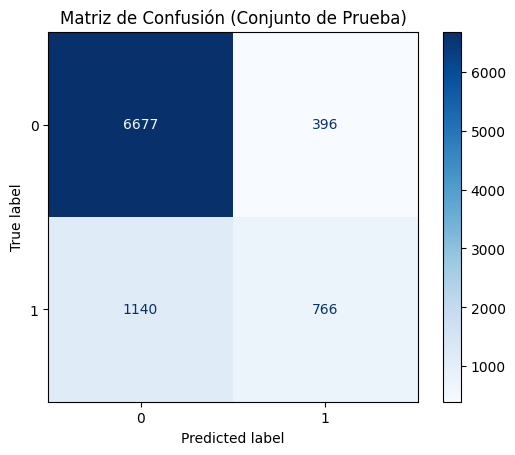

Matriz de confusión guardada en: ../files/output/confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, output_dir='../files/output'):
    """
    Genera y guarda la matriz de confusión del modelo para el conjunto de prueba.
    
    Parameters:
    - model: Modelo entrenado
    - X_test: Conjunto de características de prueba
    - y_test: Etiquetas verdaderas de prueba
    - output_dir: Directorio para guardar la matriz de confusión (opcional)
    """
    # Hacer predicciones
    y_test_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Visualizar la matriz de confusión
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión (Conjunto de Prueba)")
    plt.show()

    # Guardar la matriz de confusión como imagen
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
    print(f"Matriz de confusión guardada en: {os.path.join(output_dir, 'confusion_matrix.png')}")

# Llamar a la función en el flujo principal
plot_confusion_matrix(grid_search, X_test, y_test)

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

NameError: name 'y_test_pred' is not defined

In [ ]:
# ver parametros
import pandas as pd

# Resultados de la búsqueda
results = pd.DataFrame(grid_search.cv_results_)

# Ordenar por puntuación en la validación cruzada
sorted_results = results.sort_values(by='mean_test_score', ascending=False)

# Mostrar los mejores resultados
print(sorted_results[['mean_test_score', 'param_clf__n_estimators', 
                      'param_clf__max_depth', 'param_clf__min_samples_split', 
                      'param_clf__min_samples_leaf']].head(n=10))